# PCA
### Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.
### Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.
### Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
### Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.
### Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
### Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


importing libraries

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

loading and reading the dataset

In [5]:
df=pd.read_csv("F:\DATA SCIENCE_ExcelR\Assignments\PCA\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


columns of the dataset

In [7]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

shape of the dataset

In [9]:
df.shape

(178, 14)

this dataset contains 

In [11]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [13]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [14]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [17]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [18]:
X=df.drop(columns=["Type"])
X.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

correlation 

In [20]:
corr=X.corr()
corr

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [21]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

there are more type 2 wines followed by type 1 and type 3

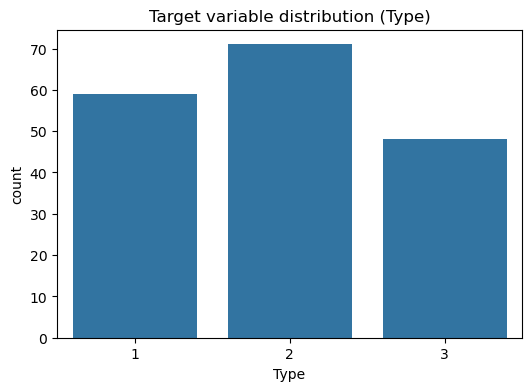

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df)
plt.title("Target variable distribution (Type)")
plt.show()

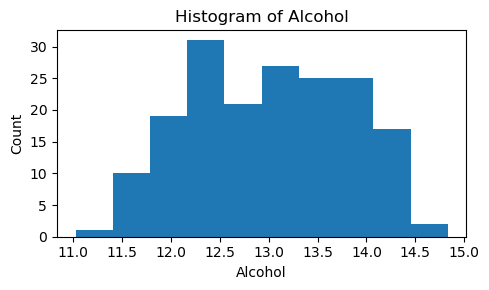

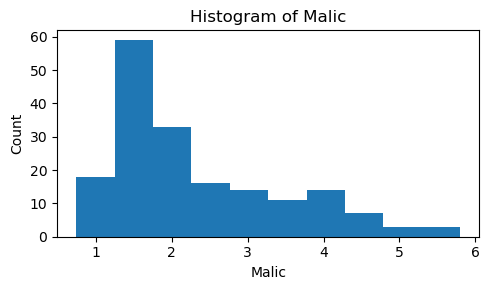

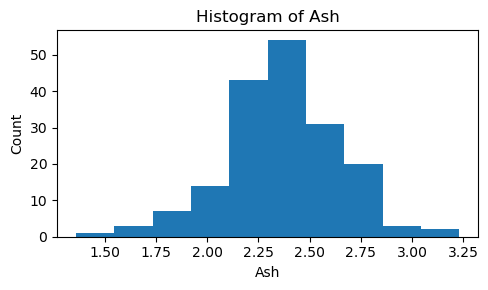

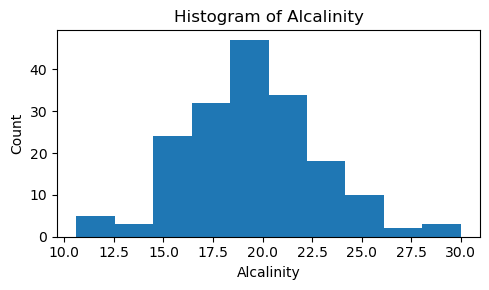

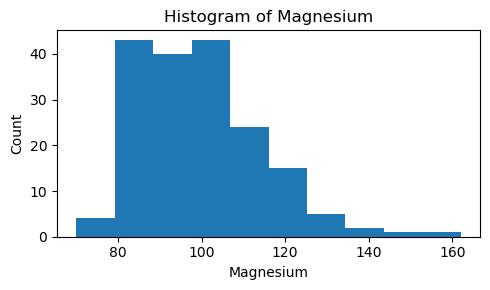

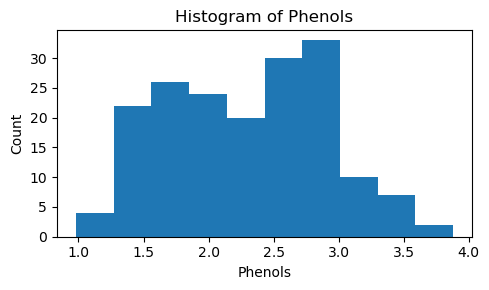

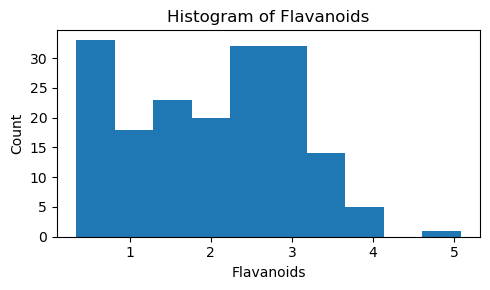

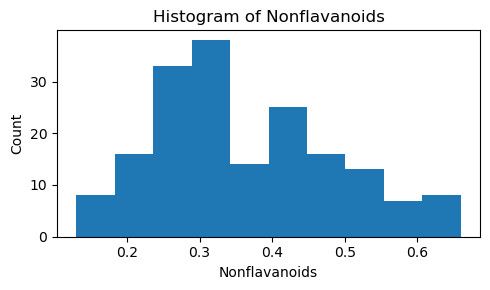

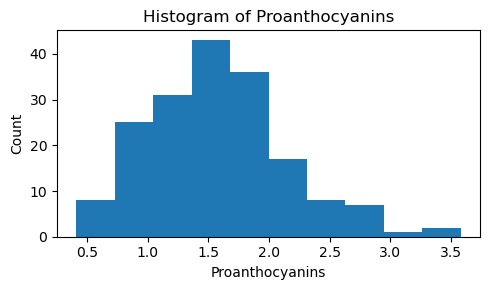

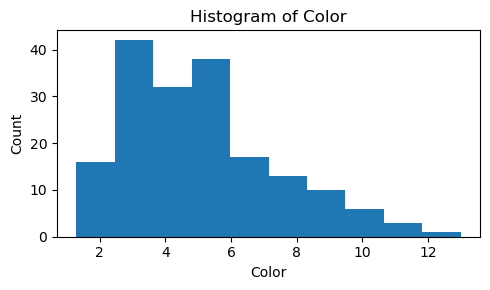

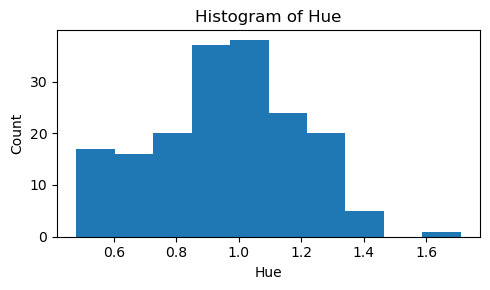

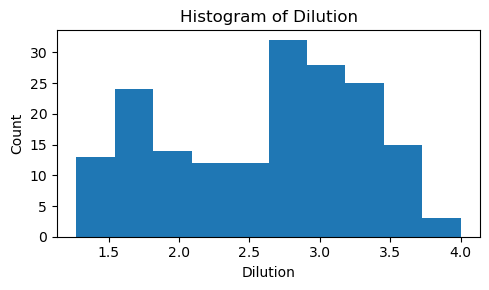

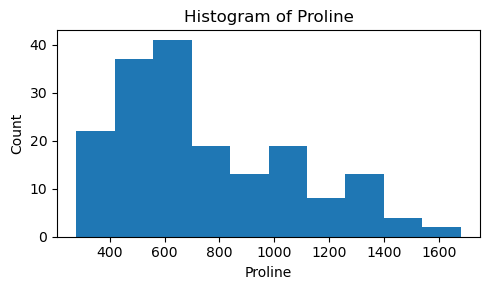

In [24]:
for col in X:
    plt.figure(figsize=(5,3))
    plt.hist(df[col].dropna())
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [25]:
for col in X:
    skew=df[col].skew()
    print(f"Skewness of {col} is {skew}")

Skewness of Alcohol is -0.051482331077134784
Skewness of Malic is 1.0396511925814442
Skewness of Ash is -0.17669931645735712
Skewness of Alcalinity is 0.21304688642645586
Skewness of Magnesium is 1.098191054755161
Skewness of Phenols is 0.08663858640245253
Skewness of Flavanoids is 0.02534355338149103
Skewness of Nonflavanoids is 0.4501513355621236
Skewness of Proanthocyanins is 0.5171371722998975
Skewness of Color is 0.8685847909572548
Skewness of Hue is 0.021091272199709302
Skewness of Dilution is -0.30728549895848106
Skewness of Proline is 0.7678217813897322


the skewness for Alcohol,Ash,Alcalinity,Phenols,Flavanoids,Hue,Dilution have almost zero so we can ignore the skewness
the skewness for Malic,Magnesium,Proanthocyanins,Color,Proline have more skewness all are posittively skewed

### checking for outliers 

In [28]:
for col in X:
    s = df[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    uwl = q3 + 1.5 * iqr
    lwl = q1 - 1.5 * iqr
    outliers = s[(s < lwl) | (s > uwl)]
    print("columm : ",col)
    print("No of outliers : ",len(outliers))
    percent=(len(outliers)/len(df))*100
    print("Outlier percentage : ",np.round(percent,3))
    print("----------------------------------------")

columm :  Alcohol
No of outliers :  0
Outlier percentage :  0.0
----------------------------------------
columm :  Malic
No of outliers :  3
Outlier percentage :  1.685
----------------------------------------
columm :  Ash
No of outliers :  3
Outlier percentage :  1.685
----------------------------------------
columm :  Alcalinity
No of outliers :  4
Outlier percentage :  2.247
----------------------------------------
columm :  Magnesium
No of outliers :  4
Outlier percentage :  2.247
----------------------------------------
columm :  Phenols
No of outliers :  0
Outlier percentage :  0.0
----------------------------------------
columm :  Flavanoids
No of outliers :  0
Outlier percentage :  0.0
----------------------------------------
columm :  Nonflavanoids
No of outliers :  0
Outlier percentage :  0.0
----------------------------------------
columm :  Proanthocyanins
No of outliers :  2
Outlier percentage :  1.124
----------------------------------------
columm :  Color
No of outlier

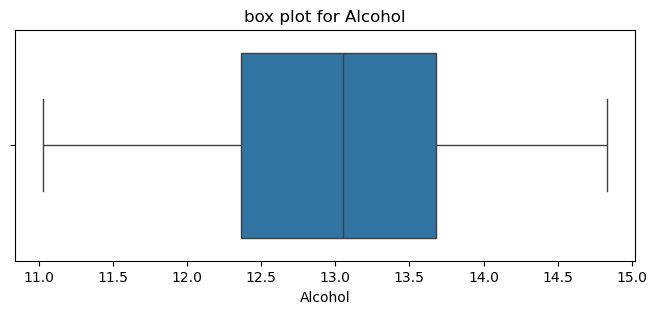

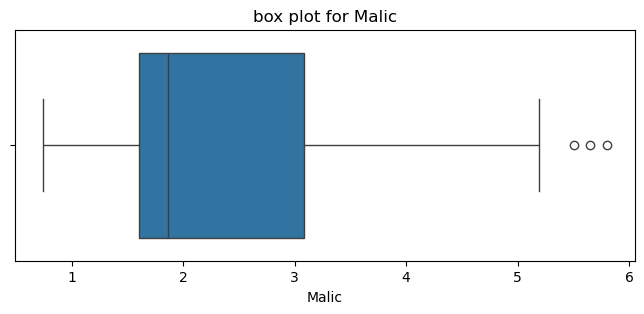

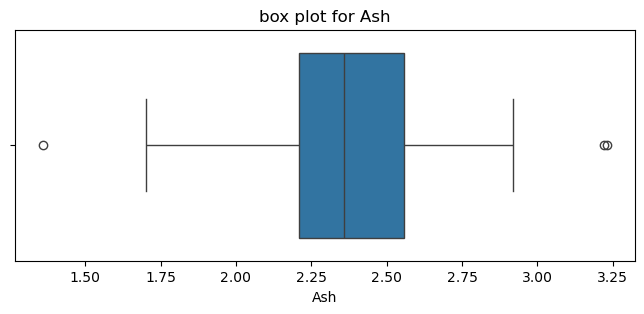

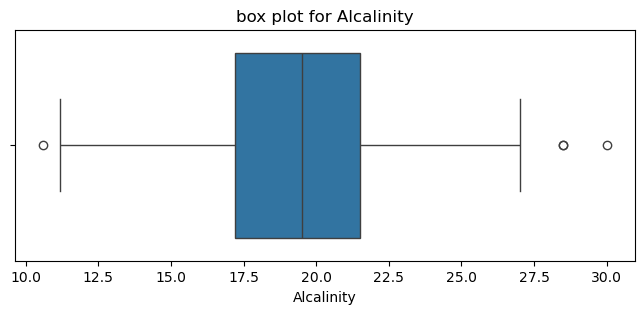

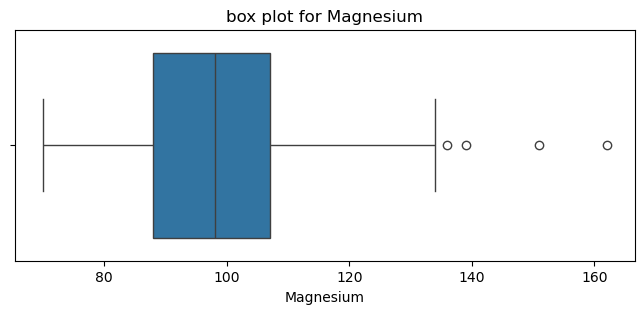

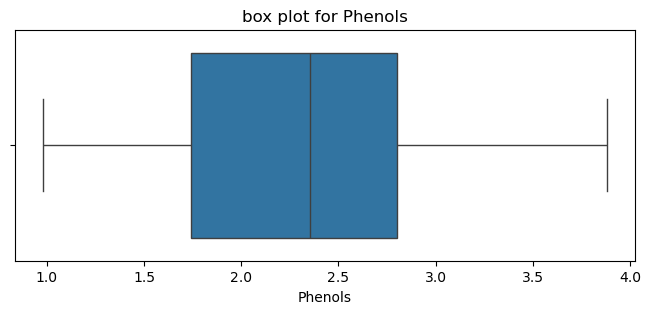

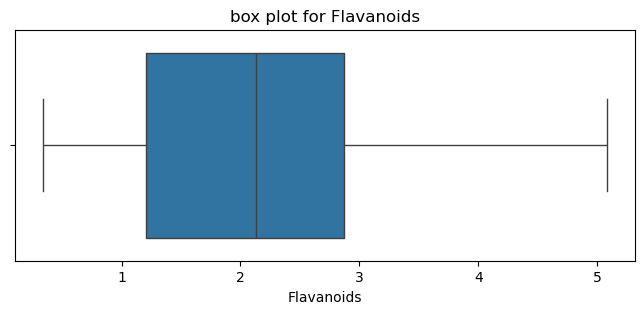

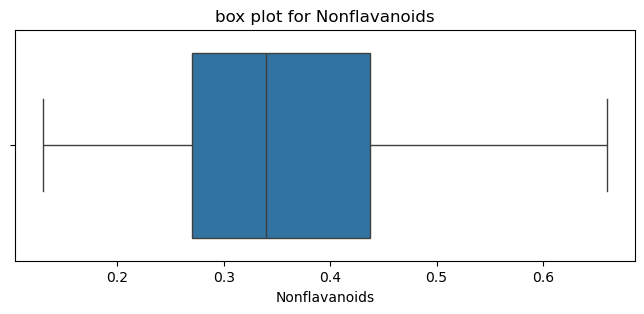

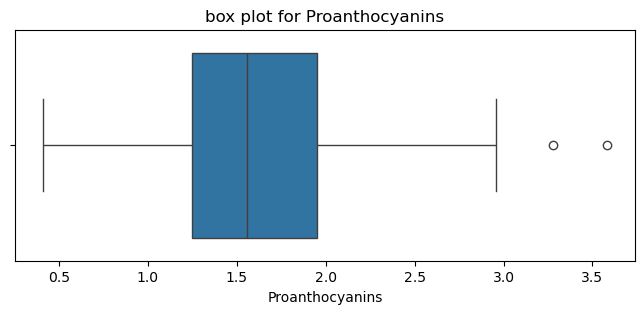

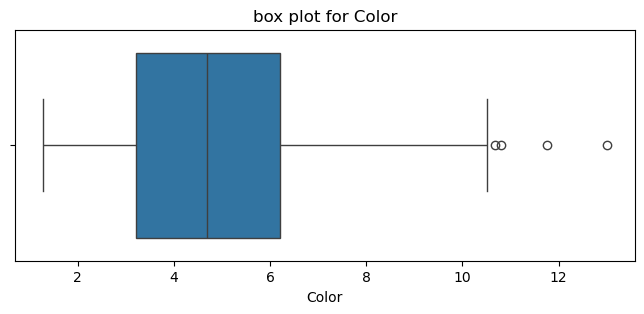

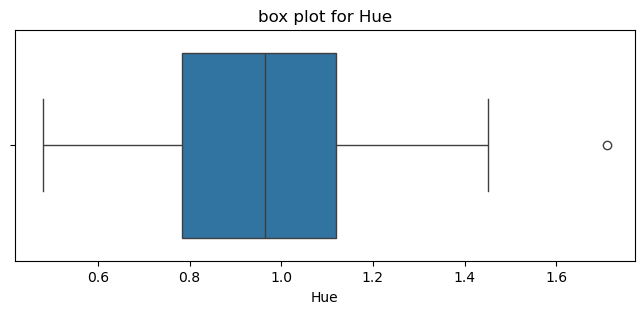

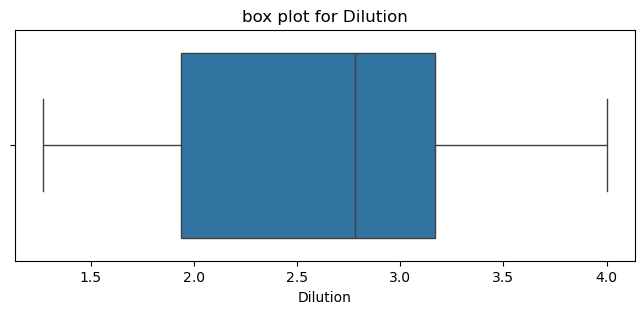

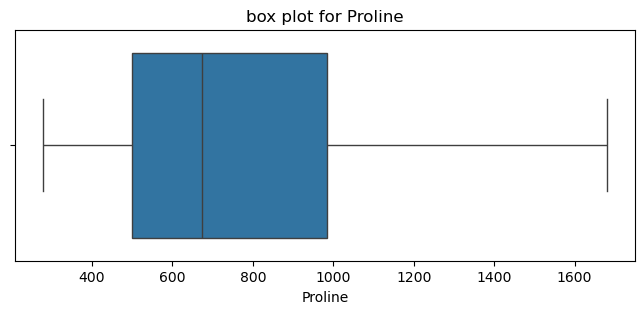

In [29]:
for col in X:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(f"box plot for {col}")
    plt.xlabel(col)
    plt.show()


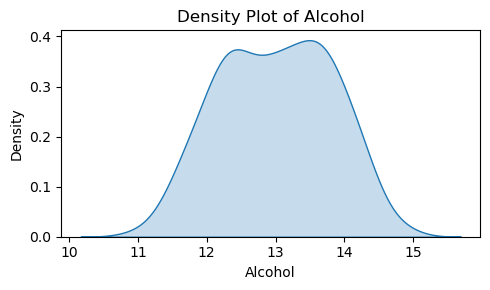

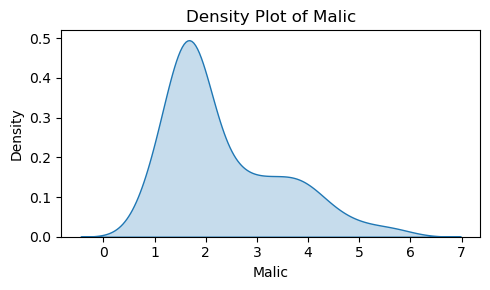

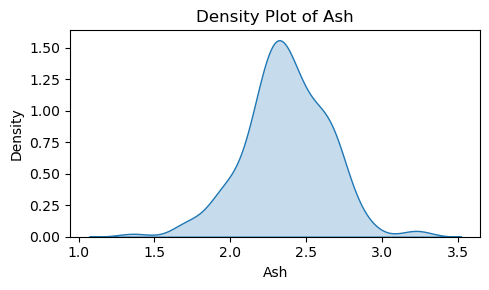

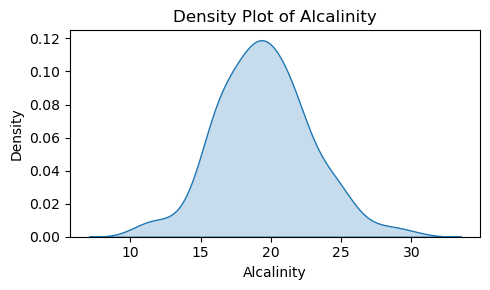

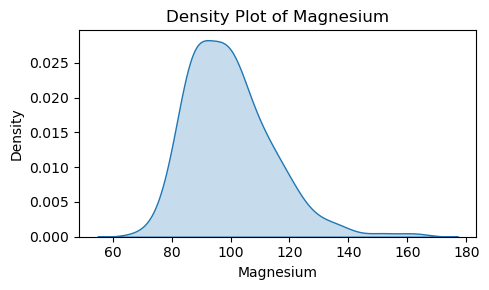

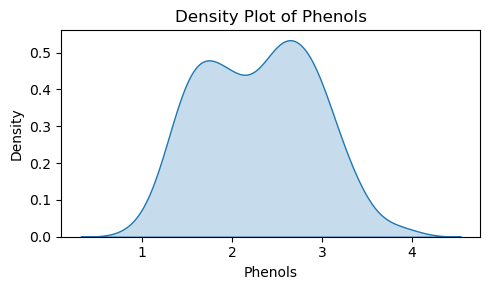

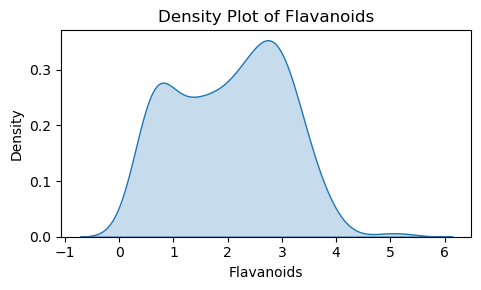

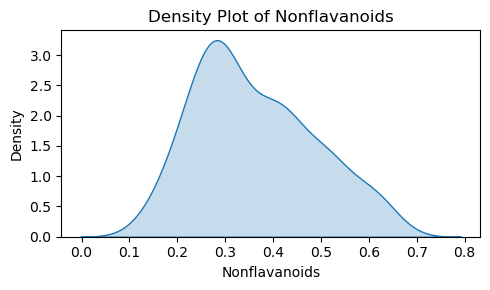

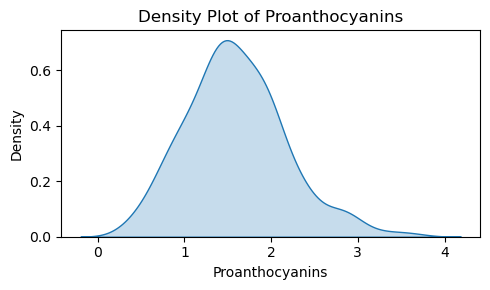

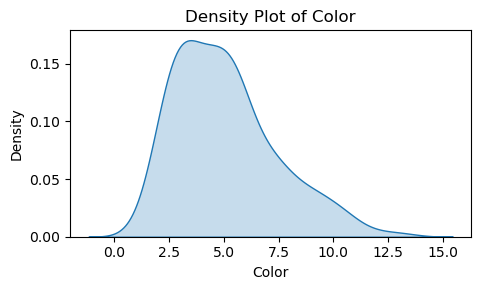

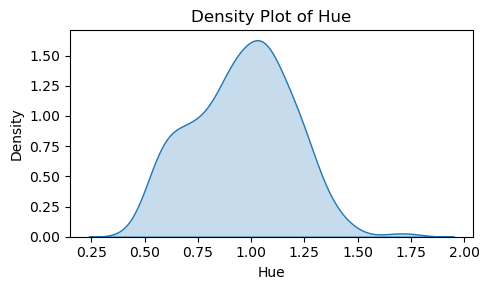

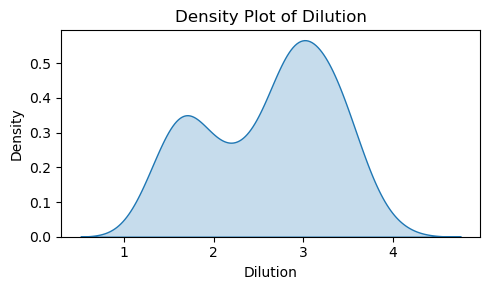

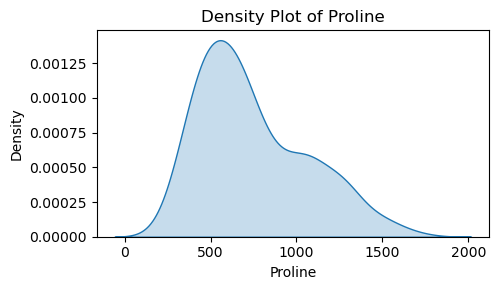

In [30]:
for col in X.columns:
    plt.figure(figsize=(5,3))
    sns.kdeplot(df[col], shade=True)
    plt.title(f"Density Plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

In [31]:
corr=X.corr()
corr

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


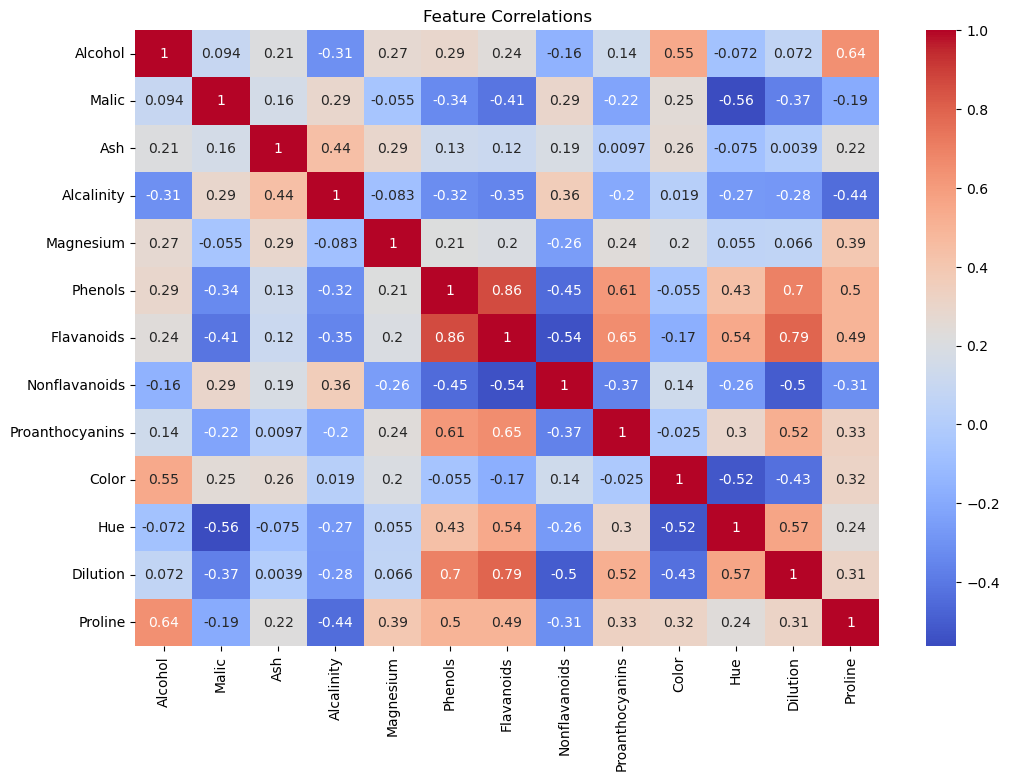

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [47]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
X=df.drop(columns=['Type'])
Y=df['Type']

In [51]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [52]:
from sklearn.decomposition import PCA

In [53]:
pca=PCA()
pca.fit(X_scaled)

PCA()

In [54]:
explained_variance=pca.explained_variance_ratio_
print(f"Explained variance ratio : {explained_variance}")

Explained variance ratio : [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [55]:
cumulative_variance = explained_variance.cumsum()
print("Cumulative explained variance:", cumulative_variance)

Cumulative explained variance: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


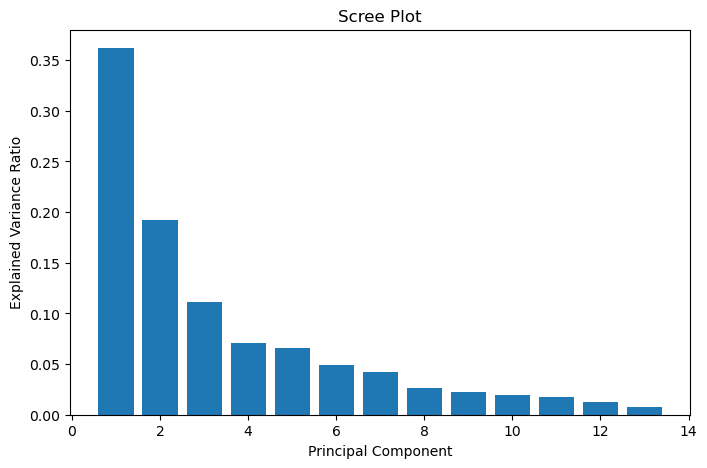

In [56]:
# Scree Plot
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


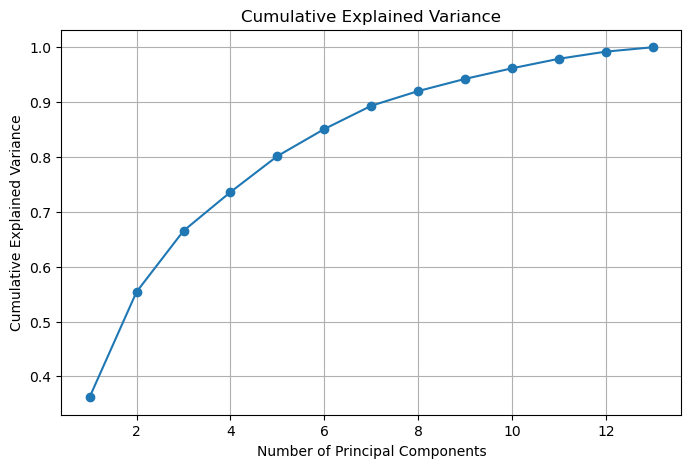

In [57]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid()
plt.show()


In [58]:
pca=PCA(n_components=7)
X_pca=pca.fit_transform(X_scaled)

In [59]:
X_pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074


In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [61]:
X_original_scaled = scaler.fit_transform(X)

In [121]:
kmeans=KMeans(n_clusters=3,random_state=42)
original_clusters=kmeans.fit_predict(X_original_scaled)

In [63]:
df["Original cluster"]=original_clusters

In [64]:
df["Original cluster"].value_counts()

Original cluster
0    65
2    62
1    51
Name: count, dtype: int64

In [65]:
score=silhouette_score(X_original_scaled,original_clusters)
print(f"Silhouette score : {score}")

Silhouette score : 0.2848589191898987


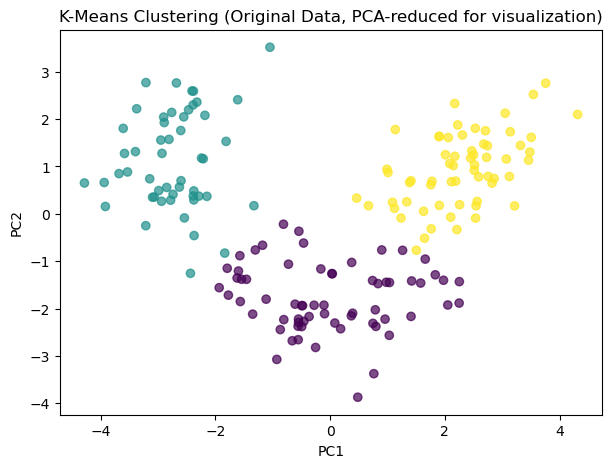

In [66]:
# Visualize clustering on original data using 2 principal components
from sklearn.decomposition import PCA
pca_vis = PCA(n_components=2)
orig_vis = pca_vis.fit_transform(X_original_scaled)

plt.figure(figsize=(7,5))
plt.scatter(orig_vis[:, 0], orig_vis[:, 1], c=original_clusters, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering (Original Data, PCA-reduced for visualization)')
plt.show()


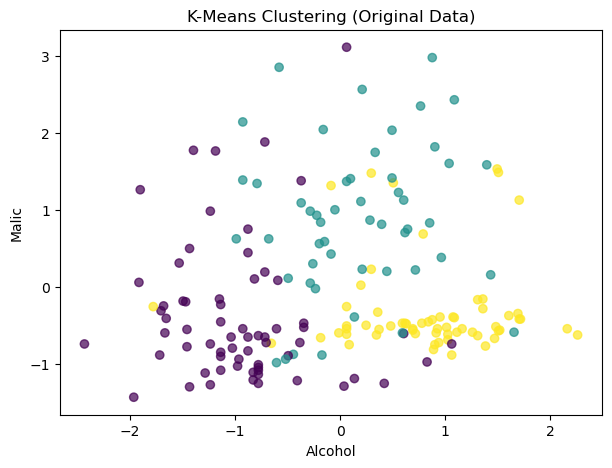

In [67]:
plt.figure(figsize=(7,5))
plt.scatter(X_original_scaled[:,0], X_original_scaled[:,1], c=original_clusters, cmap='viridis', alpha=0.7)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-Means Clustering (Original Data)')
plt.show()


In [68]:
kmeans_pca=KMeans(n_clusters=3,random_state=42)

In [72]:
pca_clusters=kmeans_pca.fit_predict(X_pca_df)

In [73]:
df["PCA clusters"]=pca_clusters

In [74]:
df["PCA clusters"].value_counts()

PCA clusters
0    65
2    62
1    51
Name: count, dtype: int64

In [75]:
sil_score_pca = silhouette_score(X_pca_df, pca_clusters)
print("Silhouette Score (PCA Data):", sil_score_pca)

Silhouette Score (PCA Data): 0.3276351722402822


In [76]:
pd.crosstab(df['Type'],df["PCA clusters"])

PCA clusters,0,1,2
Type,,,
1,0,0,59
2,65,3,3
3,0,48,0


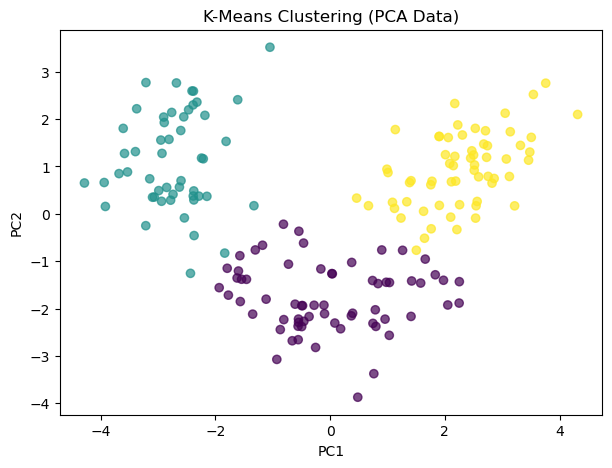

In [77]:
# Visualize clustering on PCA data
plt.figure(figsize=(7,5))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=pca_clusters, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering (PCA Data)')
plt.show()


The clustering using K-Means on both original and PCA-transformed data revealed silhouette scores of 0.284 for original data and 0.327 for PCA data

Visualization shows overlap of clusters

PCA reduced dimensionality while preserving most of the variance, as seen in the cumulative variance plot

Sometimes, clustering after PCA can improve separation due to noise reduction, but may lose key information


Using PCA simplifies the dataset and can improve computational efficiency or interpretability, but some information is lost

Clustering on the original data uses all variability but may include noise/outliers

- For high-dimensional datasets, applying PCA before clustering is recommended if most variance is retained and cluster separation improves.
- For low-dimensional data or when important information is spread across many features, careful consideration is needed before dimensionality reduction.
- Visualization and silhouette scores are crucial for comparing clustering outcomes.
- Always validate that key patterns are not lost after PCA.
